# Advanced Data Augmentation with Keras

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from PIL import Image, ImageDraw

In [3]:
import ssl
import certifi
import urllib.request

opener = urllib.request.build_opener(
    urllib.request.HTTPSHandler(context=ssl.create_default_context(cafile=certifi.where()))
)
urllib.request.install_opener(opener)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


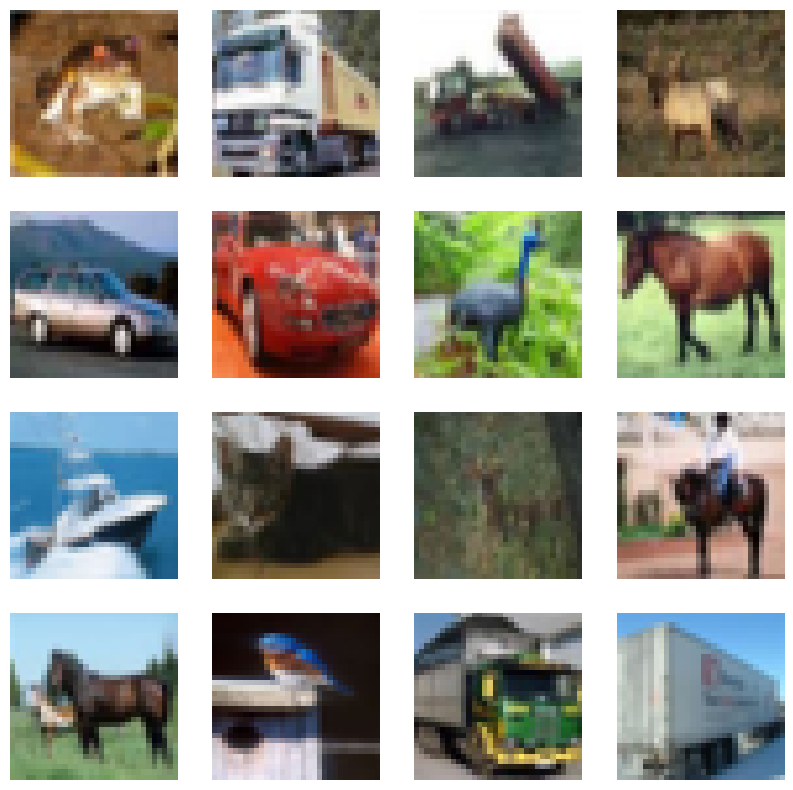

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0

# Display a sample
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()


### Create sample.jpg 

In [ ]:
# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

image.save('sample.jpg')

In [14]:
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

### Basic data augmentation

Apply basic augmentations such as rotation, width shift, height shift, shear, zoom, and horizontal flip using the ImageDataGenerator

<function matplotlib.pyplot.show(close=None, block=None)>

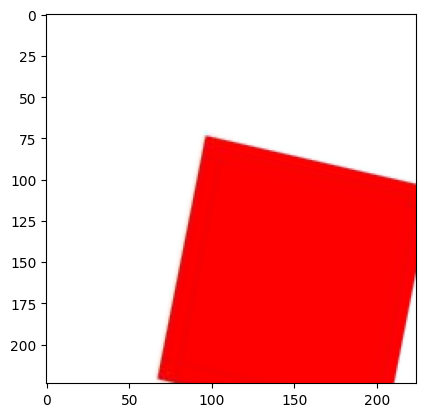

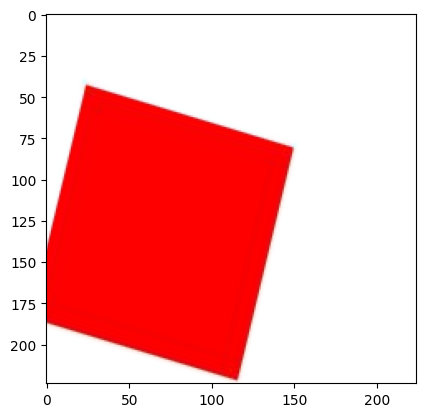

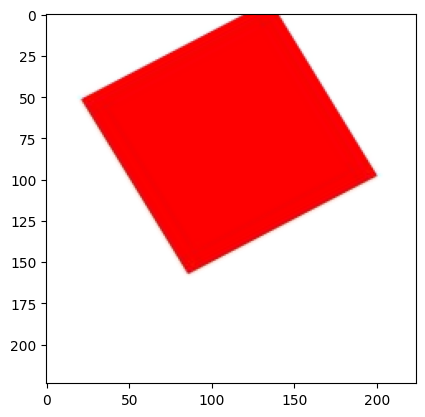

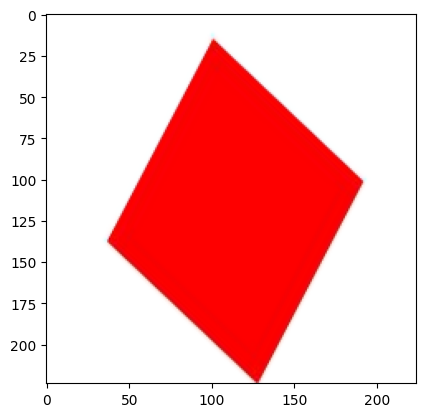

In [20]:
# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0:
    break

plt.show

### Feature-wise and sample-wise normalization

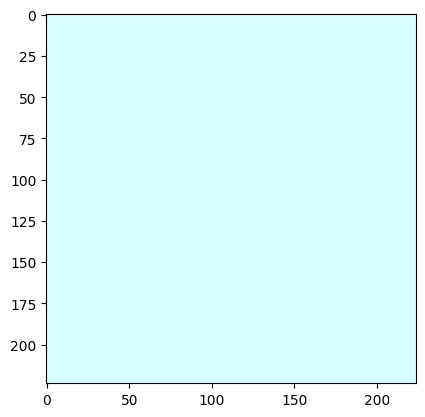

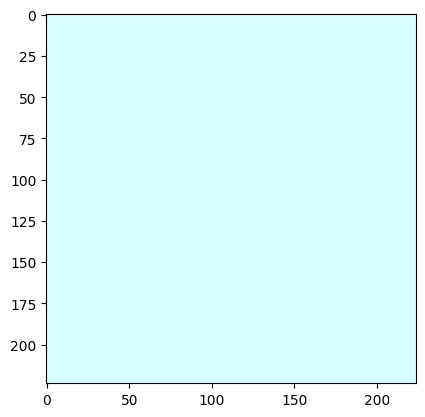

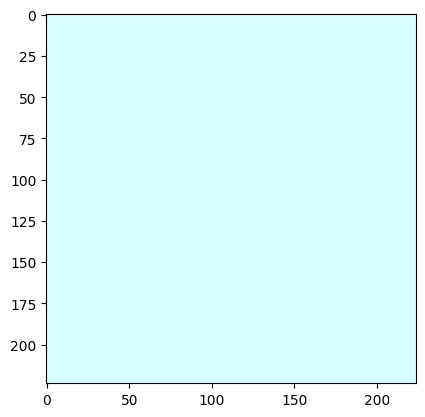

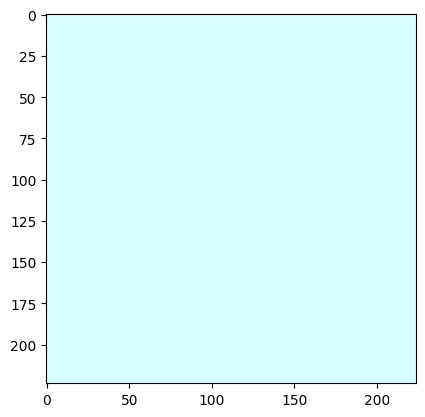

In [21]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
  featurewise_center = True,
  featurewise_std_normalization=True,
  samplewise_center=True,
  samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0:
    break

plt.show()

### Custom data augmentation function

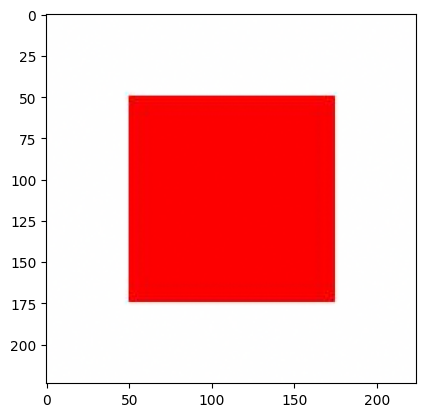

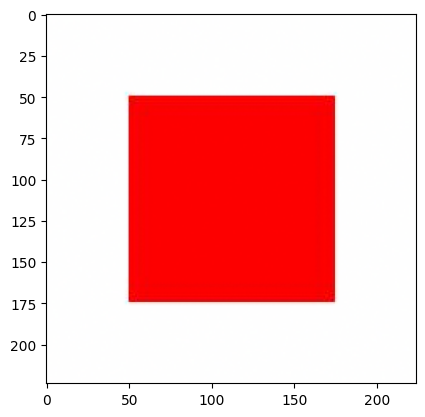

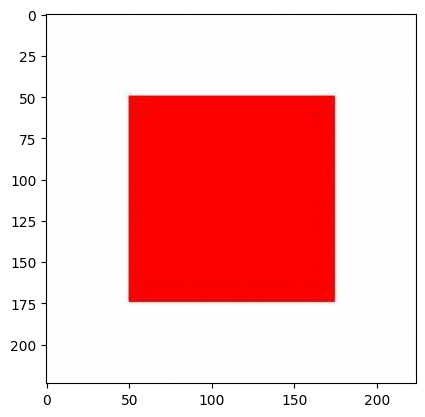

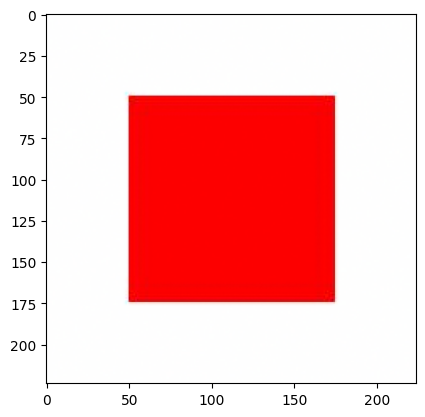

In [22]:
def add_random_noise(image):
  noise = np.random.normal(0, 0.1, image.shape)
  return image + noise

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0:
    break

plt.show()

### Visualize augmented images

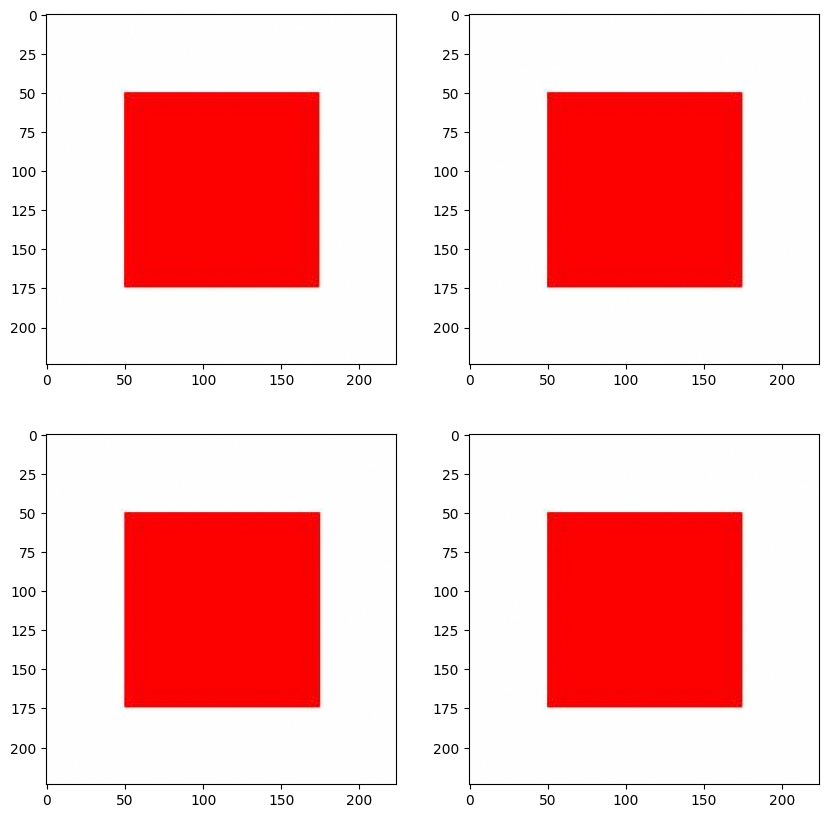

In [25]:
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
  if i >= 4:
    break
  plt.subplot(2, 2, i+1)
  plt.imshow(batch[0].astype('uint8'))

plt.show()

## Exercise 1

Objective: Experiment with different augmentation techniques and visualize their effects.

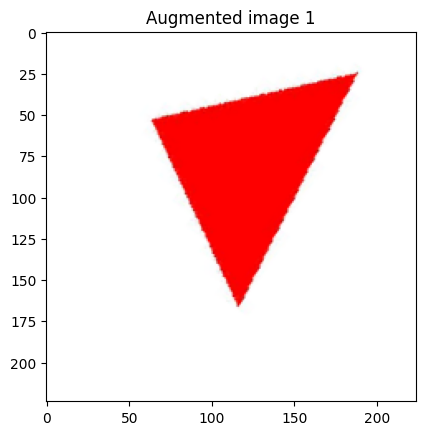

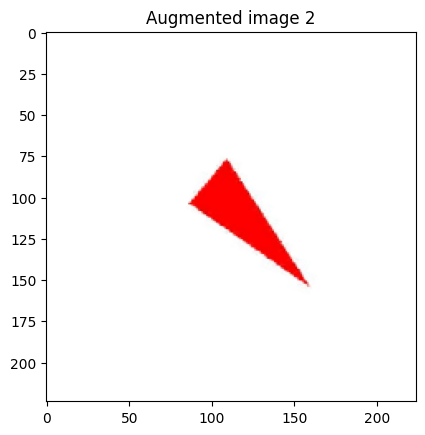

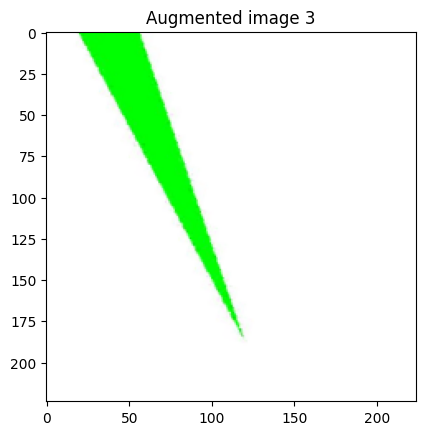

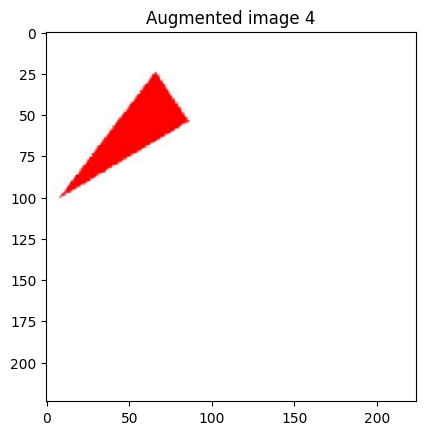

In [30]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

image_paths = [
  'sample-images/training_images1.jpg',
  'sample-images/training_images2.jpg',
  'sample-images/training_images3.jpg'
]

training_images = []
for image_path in image_paths:
  img = load_img(image_path, target_size=(224, 224))
  img_array = img_to_array(img)
  training_images.append(img_array)

training_images = np.array(training_images)

i = 0
for batch in datagen.flow(training_images, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  plt.title(f'Augmented image {i + 1}')
  i += 1
  if i % 4 == 0:
    break

plt.show()

## Exercise 2

Objective: Apply feature-wise and sample-wise normalization to the dataset.
 
Instructions:
1. Create an instance of `ImageDataGenerator` with feature-wise and sample-wise normalization.
2. Fit the `ImageDataGenerator` to the data set and visualize the normalized images.


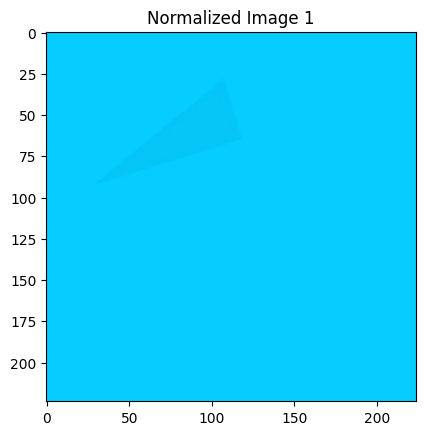

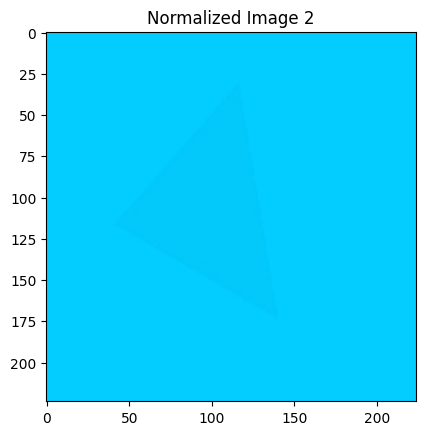

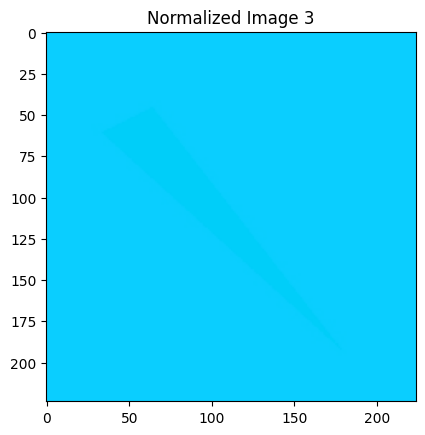

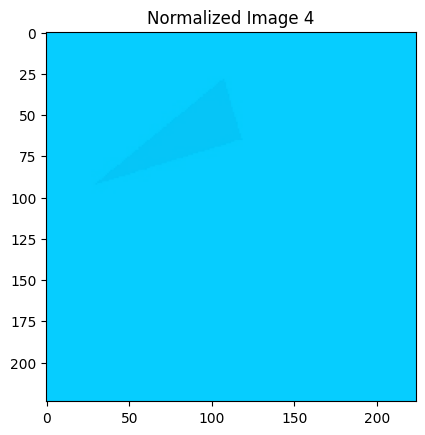

In [31]:
datagen = ImageDataGenerator(  
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Fit the ImageDataGenerator to the dataset  
datagen.fit(training_images)  

i = 0  
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Normalized Image {i + 1}')  
    i += 1  
    if i % 4 == 0:
        break  

plt.show()

## Exercise 3

Objective: Define a custom data augmentation function that adds random noise to images and apply it.
 
Instructions:
1. Define a function that adds random noise to an image.
2. Create an instance of `ImageDataGenerator` with the custom augmentation function.
3. Generate and visualize augmented images.

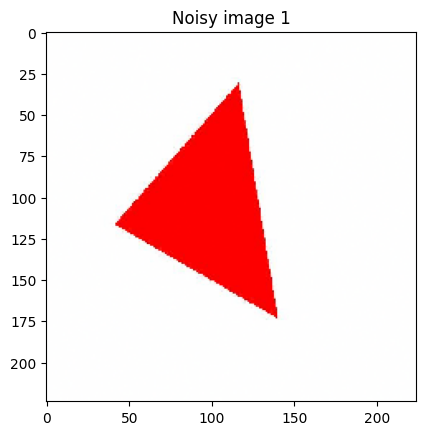

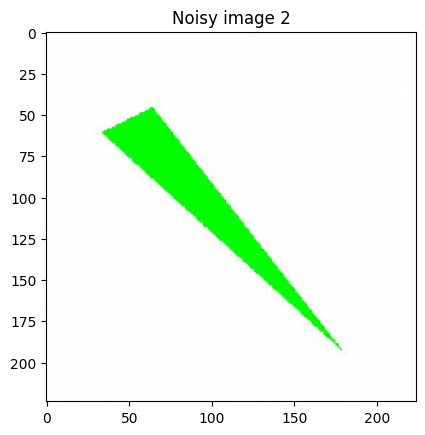

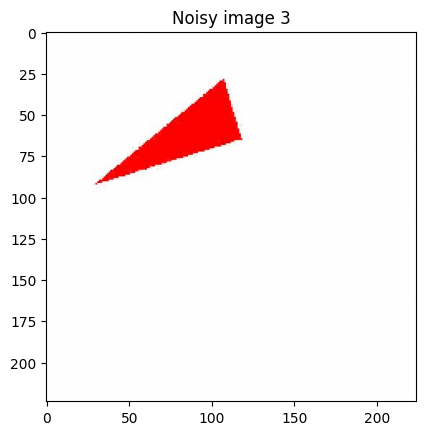

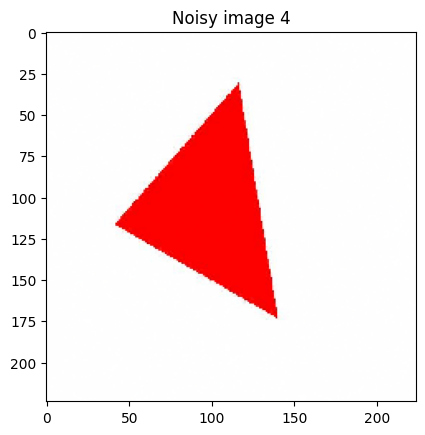

In [33]:
def add_random_noise(image):
  noise = np.random.normal(0, 0.1, image.shape)
  return image + noise

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

i = 0
for batch in datagen.flow(training_images, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  plt.title(f'Noisy image {i + 1}')
  i += 1
  if i % 4 == 0:
    break

plt.show()